In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pathlib import Path
import os.path
%matplotlib inline

train data

In [2]:
train_path = Path('D:/FRUITDATA/train')
train_filepaths = list(train_path.glob('**/*.jpg'))
print(train_filepaths[:5])

[WindowsPath('D:/FRUITDATA/train/apple/Image_1.jpg'), WindowsPath('D:/FRUITDATA/train/apple/Image_10.jpg'), WindowsPath('D:/FRUITDATA/train/apple/Image_16.jpg'), WindowsPath('D:/FRUITDATA/train/apple/Image_17.jpg'), WindowsPath('D:/FRUITDATA/train/apple/Image_18.jpg')]


validation

In [3]:
val_path = Path('D:/FRUITDATA/validation')
val_filepaths = list(val_path.glob(r'**/*.jpg'))

In [4]:
valid_labels = []

for filepath in val_filepaths:
    label = str(filepath).split("\\")[-2]
    valid_labels.append(label)

In [5]:
train_labels = []

for filepath in train_filepaths:
    label = str(filepath).split("\\")[-2]
    train_labels.append(label)

In [6]:
train_labels

['apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'b

In [7]:
import pandas as pd
#processing part 
# Convert the lists to pandas Series
train_filepaths = pd.Series(train_filepaths, name='Filepath').astype(str)
train_labels = pd.Series(train_labels, name='Label')

# Concatenate the Series to create a DataFrame
df = pd.concat([train_filepaths, train_labels], axis=1)

# Shuffle the DataFrame and reset index
df = df.sample(frac=1).reset_index(drop=True)

# Assign the shuffled DataFrame to train_df
train_df = df.copy()  # Make a copy if you want to keep df as well
train_df

,Filepath,Label
0,D:\FRUITDATA\train\banana\Image_3.jpg,banana
1,D:\FRUITDATA\train\potato\Image_91.jpg,potato
2,D:\FRUITDATA\train\orange\Image_26.jpg,orange
3,D:\FRUITDATA\train\tomato\Image_11.jpg,tomato
4,D:\FRUITDATA\train\banana\Image_56.jpg,banana
...,...,...
710,D:\FRUITDATA\train\lemon\Image_55.jpg,lemon
711,D:\FRUITDATA\train\onion\Image_48.jpg,onion
712,D:\FRUITDATA\train\pomegranate\Image_31.jpg,pomegranate
713,D:\FRUITDATA\train\lemon\Image_77.jpg,lemon


In [8]:
val_filepaths = pd.Series(val_filepaths, name='Filepath').astype(str)
valid_labels = pd.Series(valid_labels, name='Label')
df_val = pd.concat([val_filepaths, valid_labels], axis=1)
df_val = df_val.sample(frac=1).reset_index(drop=True)
valid_df = df_val.copy()  # Make a copy if you want to keep df as well
valid_df

,Filepath,Label
0,D:\FRUITDATA\validation\pomegranate\Image_5.jpg,pomegranate
1,D:\FRUITDATA\validation\pomegranate\Image_10.jpg,pomegranate
2,D:\FRUITDATA\validation\potato\Image_9.jpg,potato
3,D:\FRUITDATA\validation\apple\Image_10.jpg,apple
4,D:\FRUITDATA\validation\onion\Image_5.jpg,onion
...,...,...
85,D:\FRUITDATA\validation\carrot\Image_5.jpg,carrot
86,D:\FRUITDATA\validation\apple\Image_1.jpg,apple
87,D:\FRUITDATA\validation\cucumber\Image_1.jpg,cucumber
88,D:\FRUITDATA\validation\potato\Image_1.jpg,potato


In [9]:
train_df.head()

,Filepath,Label
0,D:\FRUITDATA\train\banana\Image_3.jpg,banana
1,D:\FRUITDATA\train\potato\Image_91.jpg,potato
2,D:\FRUITDATA\train\orange\Image_26.jpg,orange
3,D:\FRUITDATA\train\tomato\Image_11.jpg,tomato
4,D:\FRUITDATA\train\banana\Image_56.jpg,banana


In [10]:
df_no_dupl = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
df_no_dupl

,index,Filepath,Label
0,0,D:\FRUITDATA\train\banana\Image_3.jpg,banana
1,1,D:\FRUITDATA\train\potato\Image_91.jpg,potato
2,2,D:\FRUITDATA\train\orange\Image_26.jpg,orange
3,3,D:\FRUITDATA\train\tomato\Image_11.jpg,tomato
4,5,D:\FRUITDATA\train\pomegranate\Image_43.jpg,pomegranate
5,6,D:\FRUITDATA\train\lemon\Image_56.jpg,lemon
6,7,D:\FRUITDATA\train\apple\Image_24.jpg,apple
7,8,D:\FRUITDATA\train\onion\Image_3.jpg,onion
8,16,D:\FRUITDATA\train\carrot\Image_23.jpg,carrot
9,37,D:\FRUITDATA\train\cucumber\Image_79.jpg,cucumber


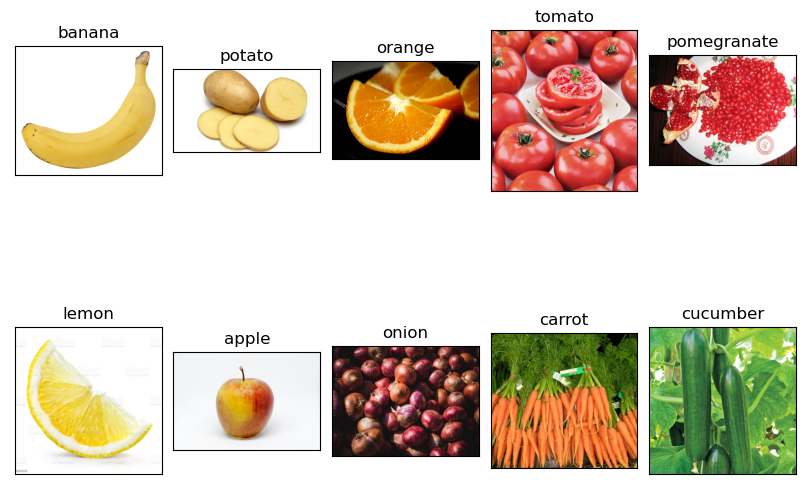

In [11]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_no_dupl.Filepath[i]))
    ax.set_title(df_no_dupl.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [12]:
import tensorflow as tf
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 715 validated image filenames belonging to 10 classes.


In [14]:
val_images = train_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 90 validated image filenames belonging to 10 classes.


In [15]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
23/23 [==============================] - 126s 5s/step - loss: 1.0454 - accuracy: 0.6853 - val_loss: 0.2532 - val_accuracy: 0.9111
Epoch 2/5
23/23 [==============================] - 75s 3s/step - loss: 0.1800 - accuracy: 0.9385 - val_loss: 0.2234 - val_accuracy: 0.9444
Epoch 3/5
23/23 [==============================] - 81s 4s/step - loss: 0.0781 - accuracy: 0.9790 - val_loss: 0.1432 - val_accuracy: 0.9778
Epoch 4/5
23/23 [==============================] - 82s 4s/step - loss: 0.0382 - accuracy: 0.9944 - val_loss: 0.1084 - val_accuracy: 0.9556
Epoch 5/5
23/23 [==============================] - 78s 3s/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9667


In [18]:
test_path = Path('D:/FRUITDATA/test')
test_filepaths = list(test_path.glob('**/*.jpg'))
test_labels = []

for filepath in test_filepaths:
    label = str(filepath).split("\\")[-2]
    test_labels.append(label)

test_filepaths = pd.Series(test_filepaths, name='Filepath').astype(str)
test_labels = pd.Series(test_labels, name='Label')
df_test = pd.concat([test_filepaths, test_labels], axis=1)
df_test = df_test.sample(frac=1).reset_index(drop=True)
test_df = df_test.copy()  # Make a copy if you want to keep df as well
test_df

,Filepath,Label
0,D:\FRUITDATA\test\pomegranate\Image_4.jpg,pomegranate
1,D:\FRUITDATA\test\lemon\Image_7.jpg,lemon
2,D:\FRUITDATA\test\potato\Image_3.jpg,potato
3,D:\FRUITDATA\test\cucumber\Image_5.jpg,cucumber
4,D:\FRUITDATA\test\cucumber\Image_3.jpg,cucumber
...,...,...
85,D:\FRUITDATA\test\potato\Image_7.jpg,potato
86,D:\FRUITDATA\test\carrot\Image_6.jpg,carrot
87,D:\FRUITDATA\test\pomegranate\Image_2.jpg,pomegranate
88,D:\FRUITDATA\test\onion\Image_6.jpg,onion


In [19]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [20]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 90 validated image filenames belonging to 10 classes.


In [21]:
test_df

,Filepath,Label
0,D:\FRUITDATA\test\pomegranate\Image_4.jpg,pomegranate
1,D:\FRUITDATA\test\lemon\Image_7.jpg,lemon
2,D:\FRUITDATA\test\potato\Image_3.jpg,potato
3,D:\FRUITDATA\test\cucumber\Image_5.jpg,cucumber
4,D:\FRUITDATA\test\cucumber\Image_3.jpg,cucumber
...,...,...
85,D:\FRUITDATA\test\potato\Image_7.jpg,potato
86,D:\FRUITDATA\test\carrot\Image_6.jpg,carrot
87,D:\FRUITDATA\test\pomegranate\Image_2.jpg,pomegranate
88,D:\FRUITDATA\test\onion\Image_6.jpg,onion


In [22]:
predictions = model.predict(test_images)
print(predictions)
print("\n")
predictions = np.argmax(predictions,axis=1)
print(predictions)
print("\n")
# Map the label
labels = (train_images.class_indices)
print(labels)
print("\n")
labels = dict((v,k) for k,v in labels.items())
print(labels)
print("\n")
predictions = [labels[k] for k in predictions]
print(predictions)
print("\n")

y_test = [labels[k] for k in test_images.classes]
y_test

3/3 [==============================] - 14s 4s/step
[[1.74482748e-01 2.04198863e-04 9.58184974e-05 2.79002525e-05
  3.58322868e-05 3.20638937e-04 3.66470951e-04 8.07896793e-01
  4.08461965e-05 1.65286884e-02]
 [1.57843817e-06 4.39900589e-07 8.84055353e-08 4.21957537e-07
  9.99572694e-01 5.53860140e-08 4.24547587e-04 3.03236725e-09
  3.53175409e-08 9.33531297e-08]
 [2.86287445e-07 1.86979867e-06 2.05585010e-07 1.94233237e-07
  1.44656440e-06 5.80024935e-05 4.38797201e-07 6.23036271e-08
  9.99932647e-01 4.92434765e-06]
 [1.10484336e-06 1.44998576e-05 4.86686780e-08 9.99954224e-01
  5.87647605e-07 2.93381290e-05 4.94394357e-08 8.46265280e-10
  9.39097973e-08 7.39257899e-08]
 [1.98338421e-06 1.86964389e-05 1.12533067e-08 9.99937892e-01
  2.27038595e-06 3.75296513e-05 1.12377982e-08 8.59494875e-09
  7.02134514e-07 8.97951963e-07]
 [5.77165671e-02 3.95062489e-05 1.09614593e-04 4.79157134e-05
  2.82572782e-05 1.08912273e-03 1.42613862e-04 3.80525109e-03
  2.77570180e-05 9.36993420e-01]
 [9.614

['pomegranate',
 'lemon',
 'potato',
 'cucumber',
 'cucumber',
 'tomato',
 'apple',
 'orange',
 'cucumber',
 'onion',
 'apple',
 'carrot',
 'carrot',
 'potato',
 'potato',
 'lemon',
 'tomato',
 'tomato',
 'pomegranate',
 'tomato',
 'tomato',
 'apple',
 'onion',
 'cucumber',
 'tomato',
 'pomegranate',
 'tomato',
 'cucumber',
 'apple',
 'onion',
 'pomegranate',
 'carrot',
 'lemon',
 'orange',
 'potato',
 'tomato',
 'pomegranate',
 'pomegranate',
 'banana',
 'banana',
 'apple',
 'carrot',
 'apple',
 'banana',
 'onion',
 'banana',
 'orange',
 'pomegranate',
 'cucumber',
 'orange',
 'banana',
 'onion',
 'potato',
 'lemon',
 'banana',
 'cucumber',
 'apple',
 'potato',
 'lemon',
 'pomegranate',
 'potato',
 'tomato',
 'lemon',
 'carrot',
 'potato',
 'banana',
 'orange',
 'cucumber',
 'lemon',
 'apple',
 'pomegranate',
 'potato',
 'tomato',
 'orange',
 'apple',
 'banana',
 'orange',
 'carrot',
 'carrot',
 'cucumber',
 'onion',
 'banana',
 'onion',
 'apple',
 'cucumber',
 'potato',
 'carrot',
 '

In [23]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 96.67%


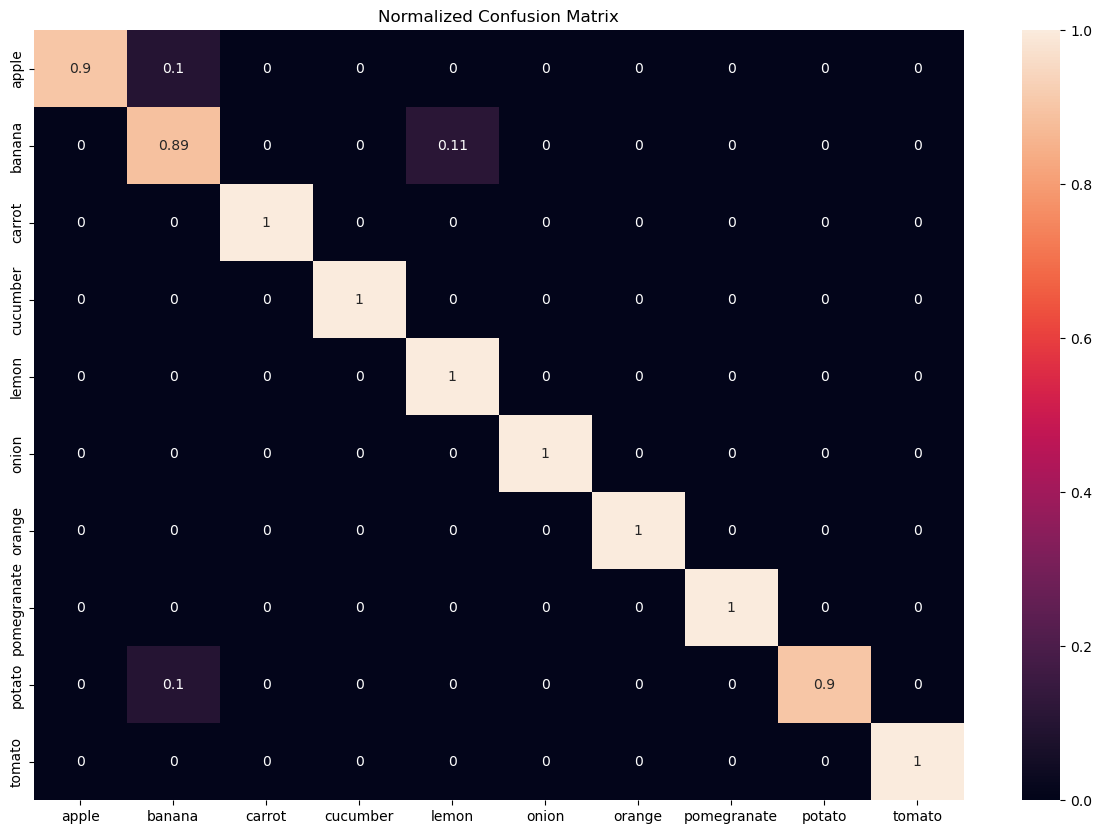

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predictions, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

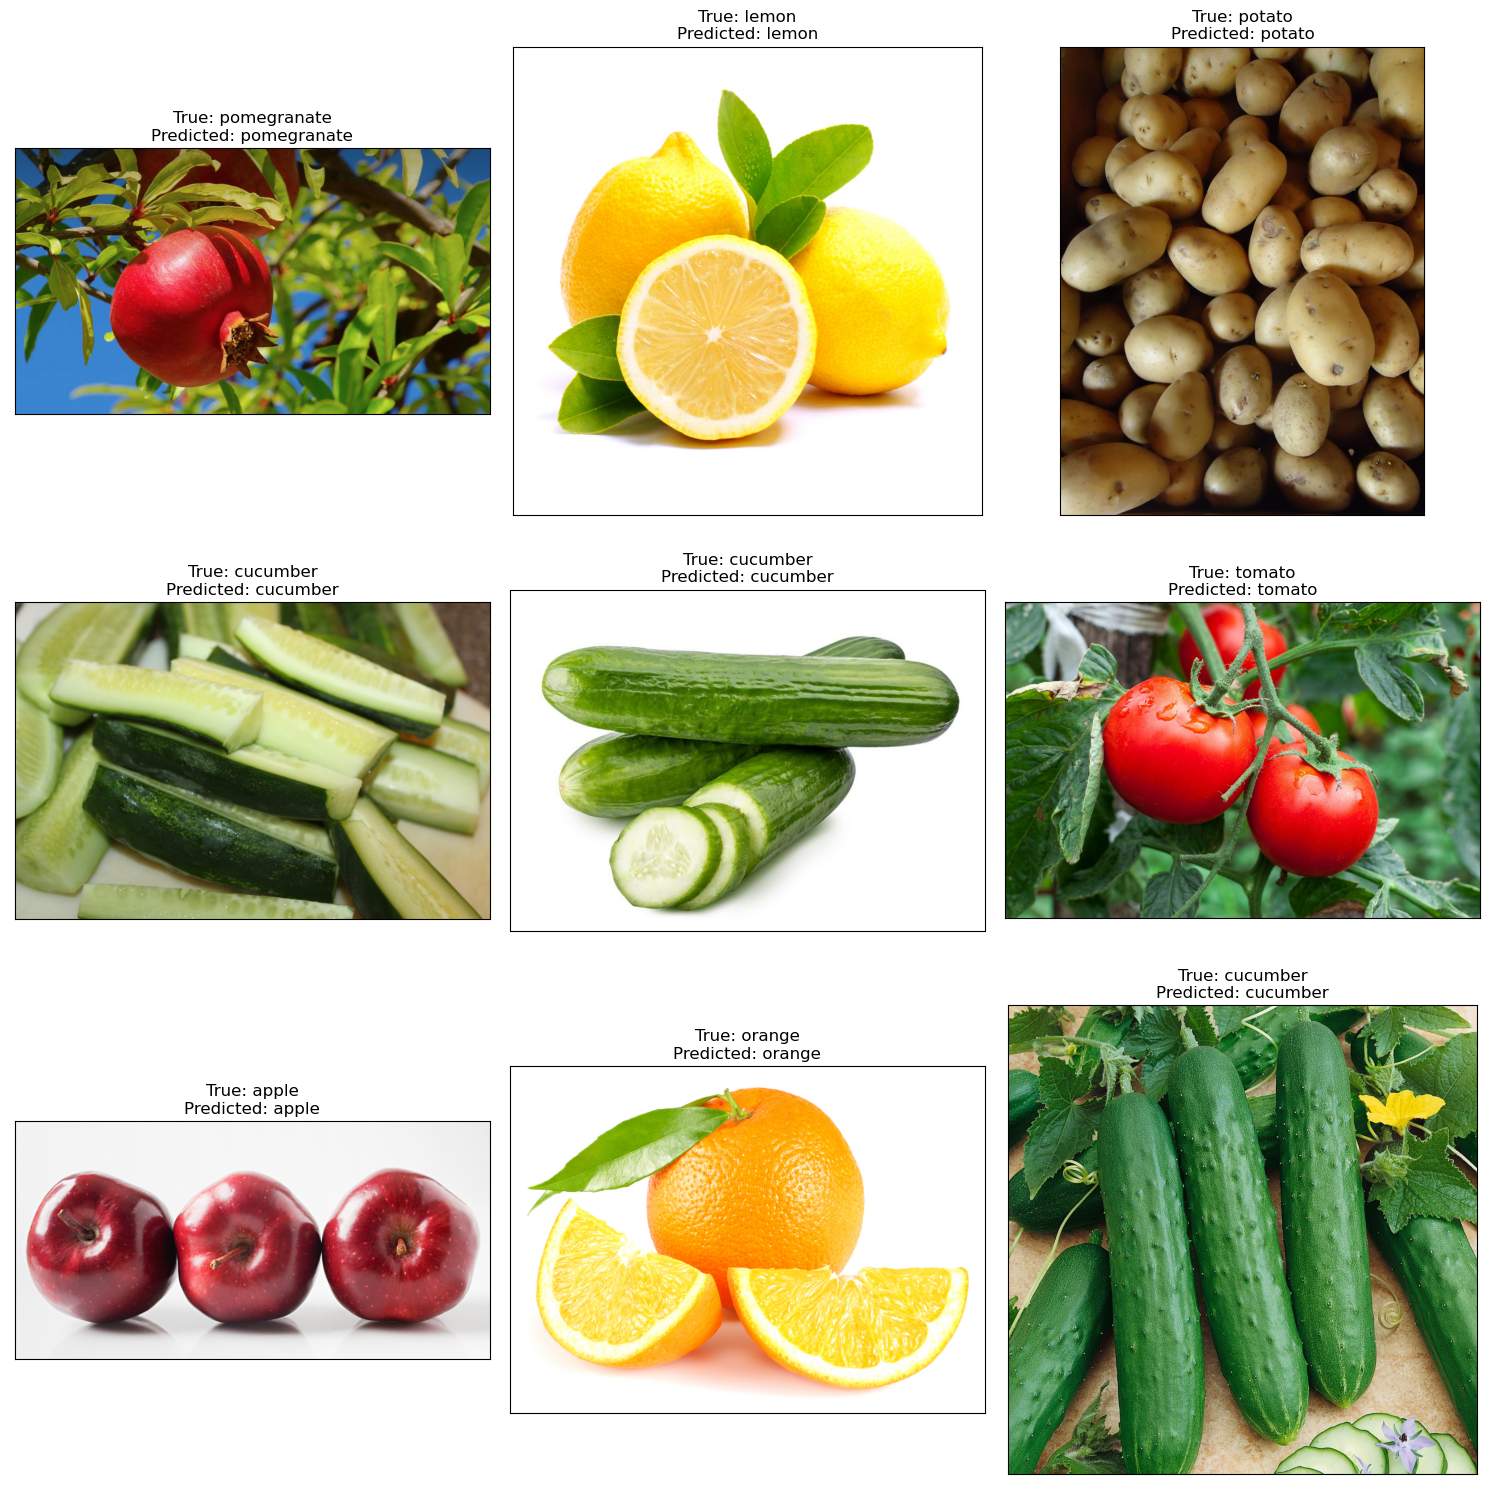

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {predictions[i]}")
plt.tight_layout()
plt.show()

In [26]:
#import pickle
#with open('fruits_vegetables_model.pkl', 'wb') as f:
#    pickle.dump(model, f)

In [27]:
#import cv2
#import numpy as np

#import pickle

# Load the model from the pickle file
#with open('fruits_vegetables_model.pkl', 'rb') as f:

#model = pickle.load(f)

In [31]:
model.save('billingClassification.h5')

In [32]:
from tensorflow.keras.models import load_model
import tensorflow as tf
loaded_model = tf.keras.models.load_model('billingClassification.h5')